##Preprocessing 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/FakeNews/Data/Total.csv')

In [ ]:
df['text'][1]

'If there s one quality Republican voters are looking for in a candidate, it s being a Christian. You don t have to know much about foreign policy, or domestic issues, or for that matter, the Constitution, but if you say you re a Christian, well, that s your golden ticket into the hearts of GOP voters everywhere. Knowing this fact, for the past several months Republican frontrunner Donald Trump has been telling people far and wide about how much he s a Christian, how much he loves the Bible, and even that it s his  favorite book. Unfortunately for Trump, his blatant maneuvering to try to convince people that he s a great Christian who follows the Bible is all crumbling down. This was incredibly evident at a campaign event at Liberty University in Lynchburg, Virginia Monday morning.In front of a large crowd of people who actually do know their Bible verses, Trump says: We re going to protect Christianity. I can say that. I don t have to be politically correct Two Corinthians, 3:17, that

In [ ]:
df.shape

(44898, 3)

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
import re
stopwords_english = stopwords.words('english')
import string
punctuations = string.punctuation


def processing_tweets(tweet):
  #re_script = re.compile('<\s*script[^>]*>.*?<\s*/\s*script\s*>', re.S | re.I)
  #css_script = re.compile('<\s*style[^>]*>.*?<\s*/\s*style\s*>', re.S | re.I)
  #tweet2 = re_script.sub('',tweet)
  #tweet2 = css_script.sub('',tweet2)
  tweet2 = re.sub(r'RT[\s]+', '', tweet)# remove old style retweet text "RT"
  tweet2 =re.sub(r'https?:\/\/?[\da-z\.-]+\.[a-z\.]{2,6}[\/\w\.-]*', '', tweet2)# remove hyperlinks
  tweet2 = re.sub(r'\/\/.*\/\/.*','', tweet2)
  tweet2 = re.sub(r'#','',tweet2) # remove hashtags，only removing the hash # sign from the word
  tweet2 = re.sub(r'[0-9]+',' ', tweet2)
  tweet2 = re.sub(r'[.,\/#!$%\^&\*;:{}=\-_`~()]+', '', tweet2)  # remove punctuations from the word


  #tweet2 = "[CLS] " + tweet2 + " [SEP]"
  #tweet_tokens = tokenizer.tokenize(tweet2) #tokenizing the tweet
  tweet_tokens = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=False).tokenize(tweet2) #tokenizing the tweet

  tweet_clean = []
  for word in tweet_tokens:
    if(word not in stopwords_english and word not in punctuations): #remove stopwords and punctuations
      tweet_clean.append(word)

  tweet_stemed = []

  for word in tweet_clean:
    if word[0]!='@' and word[0] not in punctuations:
      word_stemed = WordNetLemmatizer().lemmatize(word) #stem the words
      tweet_stemed.append(word_stemed)

  text = ""
  for word in tweet_stemed:
    text+=word
    text+=" "

  text = "[CLS] " + text + " [SEP]"


  return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['text'][14]

'WASHINGTON (Reuters) - The Senate Intelligence Committee, investigating Russian meddling in U.S. 2016 election, has asked President Donald Trump’s political organization to hand over all documents going back the campaign’s launch in June 2015, the Washington Post reported on Friday, citing two people briefed on the request.  The letter from the Senate panel seeking all documents, emails and telephone records arrived at Trump’s campaign committee last week and was addressed to its treasurer, the Post said. This marked the first time the Trump campaign organization has been drawn into the bipartisan committee’s investigation into Russian interference in the presidential election, it said. Dozens of former campaign staffers are expected to be contacted soon to ensure they are aware of the request, the Post said, citing the two people. The letter was signed by Republican Senator Richard Burr, the committee’s chairman, and Senator Mark Warner, its top Democrat, according to the Post, which

In [ ]:
processing_tweets(df['text'][38666])

'[CLS] obama hell bent closing gitmo leaf office even wrong move legacy come right american got couple senator really peeved obama latest plan move gitmo south carolina kansa guessed senator two state remember obama tried year ago go well seems desperation kicked trying dump gitmo prisoner state republican sen lindsey graham south carolina pat robert kansa arm report pentagon scouting site home state house terrorist prisoner currently detained guantanamo bay cuba received report president obama attempt shut guantanamo bay reflects another egregious overstep administration robert said statement friday referring law preventing transferring inmate u prison congress consistently stopped obama law moving single detainee u robert said reaction report kansa fort leavenworth considered terrorist suspect new home shut administration nominee secretary army prevent moving detainee kansa necessary said watch terrorist placed kansa graham equally emphatic upon learning defense secretary ash carter 

In [ ]:
anormaly = []
normal_texts = []
normal_validity = []
for i in range(len(df)):
  tmp = processing_tweets(df['text'][i])
  if tmp!='[CLS]  [SEP]':
    normal_texts.append(tmp)
    normal_validity.append(df['validity'][i])
  else:
    anormaly.append(i)




In [ ]:
df = 0

In [ ]:
dict = {'text':normal_texts, 'validity':normal_validity}
df_clean = pd.DataFrame(dict)

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/NLP/FakeNews/Data/processed_usable_news.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/FakeNews/Data/usable_news.csv')
df['text'][9]

'[CLS] really cher excusing infidelity pointed donald trump fell love marla maple ended marrying many twisted affair bill marriage hillary happy ending woman involved bill multiple affair woman loved simply pervert clearly respect sanctity marriage make mistake comparing single affair trump serial philanderer simply fair comparisontrump cant throw one stone pres clinton regarding cheating trump humiliated wife headline wksbecause cheating cher january marla maple true feeling donald trumpand former president convicted liar serial pervert bill clinton said b must reiterateif there pres trump u thank medium news source handed win silver platter free cher december honestly think pathological side trump always existedhoweverthis campaign opened pandora boxhe lowest common denominator cher december way comparisonaside famous white house affair teenager intern monica lewinsky list accusation serial pervert bill clintonjuanita broaddrick ar rapeeileen wellstone oxford rapeelizabeth ward grace

In [ ]:
df[]

##Starting from here


In [ ]:
import pandas as pd

In [ ]:
df_news = pd.read_csv('/content/drive/MyDrive/NLP/FakeNews/Data/processed_usable_news.csv')

In [ ]:
df_news.shape

(44241, 3)

In [ ]:
df_news.dtypes

Unnamed: 0     int64
text          object
validity       int64
dtype: object

In [ ]:
pip install urllib3


In [ ]:
pip install pytorch-transformers 

     |████████████████████████████████| 184kB 6.1MB/s 
     |████████████████████████████████| 1.2MB 38.4MB/s 
     |████████████████████████████████| 890kB 50.6MB/s 
     |████████████████████████████████| 133kB 49.9MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 7.3MB 51.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=dd2e23eda8e5cf60e177168fbdec1120b9ac22c3865382a1929ea82766435786
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.20.13 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:

import torch
import numpy
from pytorch_transformers import BertTokenizer
from  pytorch_transformers import BertModel
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')
bert_0 = BertModel.from_pretrained('bert-base-uncased',output_hidden_states=True)
bert_0.eval()

SyntaxError: ignored

In [ ]:
bert_0.to(device)


In [ ]:
device

device(type='cuda', index=0)

In [ ]:
bert_0.eval()

In [ ]:
##Generate corpus
import torch
import numpy as np




def Generate_and_Save_Word_Embeddings(texts,targets, path, path_target, embedder, tokenizer):#Generate and save a word embedding tensor from a dataframe, and save it to path
  corpus = []
  ids = []
  texts = texts.values.tolist()
  n = len(texts)
  max = 0
  targets = targets.values.tolist()
  target = []


  for i in range(n): #range(len(data['tweet'])):
    sentence = texts[i]
    sentence = tokenizer.tokenize(sentence)
    if len(sentence) <= 512:
      for j in range(512 - len(sentence)):
        sentence.append("")
    else:
      sentence = sentence[0:512]
    indexed_tokens = tokenizer.convert_tokens_to_ids(sentence)
    corpus.append(sentence)
    ids.append(indexed_tokens)
    target.append(targets[i])
    
    

  new_corpus = []
  new_ids = []
  for i in range(0, len(corpus)):
    if len(corpus[i])>0:
      new_corpus.append(corpus[i])
      new_ids.append(ids[i])

  # Convert inputs to PyTorch tensors
  token_tensors = []
  for indexed_tokens in new_ids:
    tokens_tensor = torch.tensor([indexed_tokens])
    token_tensors.append(tokens_tensor)
  # Put the model in "evaluation" mode,meaning feed-forward operation.

  word_embeddings = []
  with torch.no_grad():
    for tokens_tensor in token_tensors:
      tokens_tensor = tokens_tensor.to(device)
      outputs = embedder(tokens_tensor)
  # can use last hidden state as word embeddings
      last_hidden_state = outputs[0]
      word_embeddings.append(last_hidden_state)#.detach().numpy())
      #word_embeddings = np.stack(word_embeddings, axis=0)
      #word_embeddings = torch.from_numpy(word_embeddings)
  x = []
  for i in word_embeddings:
    i = i.to('cpu')
    n = i.detach().numpy()
    x.append(n)
    target

  x = np.stack(x, axis = 0)
  x = torch.from_numpy(x)
  x = torch.squeeze(x)
  torch.save(x, path)
  target = torch.tensor(target)
  torch.save(target, path_target)
  return x.shape, target.shape


In [ ]:
for i in range(22):
  path1 =  '/content/drive/MyDrive/NLP/FakeNews/Data/fkt_'+str(i)+'.pt'
  path2 = '/content/drive/MyDrive/NLP/FakeNews/Data/fktarget_'+str(i)+'.pt'
  start = 2000*i
  end = 2000*i + 2000
  ttext = df_news['text'][start:end]
  ttarget = df_news['validity'][start:end]
  shape1, shape2 = Generate_and_Save_Word_Embeddings(ttext, ttarget, path1, path2, bert_0, tokenizer1)
  print(shape1, shape2)
  print()

In [ ]:
bert_0.eval()

##Start From Here

In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:
from torch.utils.data import DataLoader

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, x, y):
        'Initialization'
        self.x = x
        self.y = y 

  def __len__(self):
        'Denotes the total number of samples'
        return self.x.shape[0]

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        # Load data and get label
        X = self.x[index]
        y = self.y[index]

        return X, y




In [3]:
sample_path1 = '/content/drive/MyDrive/NLP/FakeNews/Data/fkt_5.pt'
target_path1 =  '/content/drive/MyDrive/NLP/FakeNews/Data/fktarget_5.pt'
sample_path2 = '/content/drive/MyDrive/NLP/FakeNews/Data/fkt_6.pt'
target_path2 =  '/content/drive/MyDrive/NLP/FakeNews/Data/fktarget_6.pt'

sample = torch.cat((torch.load(sample_path1), torch.load(sample_path2)), 0)
target = torch.cat((torch.load(target_path1), torch.load(target_path2)), 0)


In [4]:
train_dataset = Dataset(sample.to(device), target.to(device))


In [5]:
sample = 0
target = 0

In [ ]:
len(train_dataset)

4000

In [6]:
train_loader = DataLoader(dataset = train_dataset, batch_size = 500, shuffle = True)

In [7]:
train_dataset = 0

In [8]:
len(train_loader)

8

In [9]:
from torch.utils.data import DataLoader


def training(model0, epochs, lr1):
  loss_l = []
  criterion = nn.CrossEntropyLoss()
  model = model0
  model.cuda()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr1, weight_decay=0)

  
  for epoch in range(epochs):
    optimizer.zero_grad
    n = 0
    l = 0
    for x_batch, y_batch in train_loader:
          # the dataset "lives" in the CPU, so do our mini-batches
          # therefore, we need to send those mini-batches to the
          # device where the model "lives"
      x_batch = x_batch.cuda()
      y_batch = y_batch.cuda()
      yhat = model(x_batch)
      loss = criterion(torch.squeeze(yhat), y_batch)
      loss.backward()
      optimizer.step()
      l = l + loss
      n = n+1
    loss_l.append(l/n)

  return model, loss_l


In [10]:
import torch.nn as nn
import torch
import torch.functional as F
class CLSTM(nn.Module):
  def __init__(self):
    super(CLSTM, self).__init__()
    self.dropout = nn.Dropout(p=0.2).cuda()
    self.layer1 = nn.Conv1d(768, 100, 10, stride = 5).cuda()
    self.maxpool1 = nn.MaxPool1d(3).cuda()
    self.layer2 = nn.LSTM(100, 100, 1).cuda()
    self.h0 = torch.randn(1, 33, 100).cuda()
    self.c0 = torch.randn(1, 33, 100).cuda()
    self.maxpool2 = nn.MaxPool2d((33, 1)).cuda()
    self.layer3 = nn.Linear(100, 3).cuda()


  def forward(self, x):
    x = self.dropout(x)
    x = x.permute(0, 2, 1)
    x = self.layer1(x)
    x = nn.functional.relu(x)
    x = self.maxpool1(x)
    x = x.permute(0, 2, 1)
    x, (h, c) = self.layer2(x, (self.h0, self.c0))
    x = self.maxpool2(x)
    x = torch.squeeze(x)
    x = self.layer3(x)
    
    return x
    


In [ ]:
model1 = CLSTM()


In [ ]:
model1, l1 = training(model1, 30, 0.00001 )

In [ ]:
torch.save(model1, '/content/drive/MyDrive/NLP/FakeNews/Model/fakenewsdetector.pth')


In [11]:
modelx = torch.load('/content/drive/MyDrive/NLP/FakeNews/Model/fakenewsdetector.pth')
modelx.eval()


CLSTM(
  (dropout): Dropout(p=0.2, inplace=False)
  (layer1): Conv1d(768, 100, kernel_size=(10,), stride=(5,))
  (maxpool1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (layer2): LSTM(100, 100)
  (maxpool2): MaxPool2d(kernel_size=(33, 1), stride=(33, 1), padding=0, dilation=1, ceil_mode=False)
  (layer3): Linear(in_features=100, out_features=3, bias=True)
)

In [ ]:
model1.state_dict()

In [ ]:
l2 = []

In [ ]:
l2+=l1

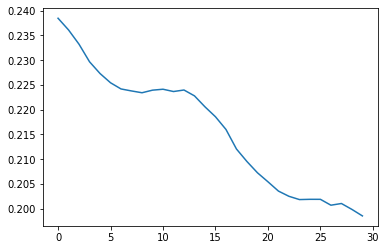

In [ ]:
import matplotlib.pyplot as plt
plt.plot(l2)

accuracy = 98.0%
f1 = 97.99987199180748%

accuracy = 97.39999999999999%
f1 = 97.39624017080664%

accuracy = 97.8%
f1 = 97.79356603856849%

accuracy = 97.39999999999999%
f1 = 97.3997399739974%

accuracy = 97.8%
f1 = 97.79681860606716%

accuracy = 97.2%
f1 = 97.19712986097764%

accuracy = 98.0%
f1 = 97.99794990069832%

accuracy = 96.2%
f1 = 96.18337478054406%

average accuracy =  97.475%
average f1 =  97.4705864154334%


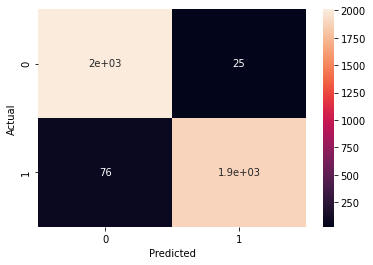

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np

acc = 0
f1 = 0
roc_auc = 0
pred = []
true = []
n = 0
for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        yhat = modelx(x_batch)
        arg = torch.squeeze(yhat)
        ypred = torch.argmax(arg, dim = 1).to('cpu').detach().numpy()
        pred.append(ypred)
        ytrue = y_batch.to('cpu').detach().numpy()
        true.append(ytrue)
        ac = accuracy_score(ytrue, ypred)
        print("accuracy = "+str(100*ac)+"%")
        acc+=ac
        f = f1_score(ytrue, ypred, average='macro')
        print("f1 = "+str(100*f)+"%")
        f1+=f
        print()
        n = n+1
        #roc_auc+=roc_auc_score(ytrue, ypred, average='macro')
print('average accuracy = ', str(100*acc/n)+"%")
print('average f1 = ', str(100*f1/n)+"%")
#print('roc = ', roc_auc/(len(tweet_data_test)/100))

pred = np.concatenate(pred)
true = np.concatenate(true)
pp = pred
tt = true 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

data = {'y_Actual':   tt,
        'y_Predicted':pp
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
password = input("Enter Password: ")


Enter Password: ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp


In [ ]:
print(password)

ppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp


In [ ]:
model1.state_dict

<bound method Module.state_dict of CLSTM(
  (dropout): Dropout(p=0.2, inplace=False)
  (layer1): Conv1d(768, 100, kernel_size=(10,), stride=(5,))
  (maxpool1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (layer2): LSTM(100, 100)
  (maxpool2): MaxPool2d(kernel_size=(33, 1), stride=(33, 1), padding=0, dilation=1, ceil_mode=False)
  (layer3): Linear(in_features=100, out_features=3, bias=True)
)>

In [ ]:
def fake_news_detector(str):
  